# Eksplorativna analiza podataka

> U ovoj svesci ćemo prikazati kako radimo preliminarnu, eksplorativnu analizu podataka sa kojima se prvi put srećemo. Teško je postaviti granice dokle se analiza smatra eksplorativnom, a kad postaje neka druga. Sigurno je da bez nje ne možemo mnogo da uradimo kasnije. EDA je korak koji ne može da se preskoči.

Eksplorativna analiza podataka (EDA od eng. _Exploratory Data Analysis_) je preliminarna faza analize podataka. Ona je veoma važna za podatke sa kojima se prvi put susrećemo. Tokom ove faze ispitujemo opšte karakteristike skupa podataka: koji su to podaci, koliko ih ima, kog su tipa, kakva im je struktura itd. EDA daje uvid u podatke numerički i grafički. Idealno, ova dva načina se kombinuju po potrebi. 

Ekplorativna analiza zahteva dosta vremena. Iako bi trebalo da prethodni fazi čišćenja podataka, često ih nije moguće razdvojiti pa se rade istovremeno. EDA može da sadrži različite tipove kratkih analize, ali se oni svode na svega nekoliko glavnih zadataka. Od EDA se očekuje da:
* istraži strukturu podataka (koliko ima podataka, kog, tipa, šta su atributi),
* uoči nedostajuće podatke i očigledne greške,
* uoči raspodele podataka i proceni njene parametre,
* omogući skiciranje modela odnosa među varijablama i da
* omogući identifikovanje ključnih varijabli. 

Za veće i heterogene skupove podataka nije dovoljno dati sumarni prikaz sveden na nekoliko brojeva. Često je neophodno da "vidimo" podatke, njihove raspodele i neočekivana odstupanja. Grafici u EDA su obično histogrami, kutijasti dijagrami (_boxplots_) i tačkasti dijagrami (_scetter plots_). Svrha ovih dijagrama nije komunikacija rezultata već pre svega vizuelno ispitivanje skupa podataka.

Ovde ćemo prikazati kako bi eksplorativna analiza mogla da izgleda za istorijske podatke o rang-listama Fortune 500. Fajl sa ovim podacima je dostupan na https://s3.amazonaws.com/dq-blog-files/fortune500.csv. Nemamo meta-podatke o podacima u ovom fajlu tako da ćemo morati sami da otkrijemo šta je unutra.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Prvo, da učitamo __fortune500.csv__ fajl direktno sa veba. Sadržaj fajla smeštamo u *data frame* koji ćemo kreativno nazvati **df**.

(Ako se ispostavi da link više ne radi, koristite istoimeni fajl iz foldera __/data__.)

In [2]:
df=pd.read_csv("https://s3.amazonaws.com/dq-blog-files/fortune500.csv")

## Struktura skupa podataka

Učitali smo podatke u tabelu. Sada treba da vidimo šta je u tabeli. Kako prvo, da vidimo koje su dimenzije tabele?

In [3]:
df.shape

(25500, 5)

Tabela ima 25500 vrsta i 5 kolona. Šta se nalazi po kolonama?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   25500 non-null  int64  
 1   Rank                   25500 non-null  int64  
 2   Company                25500 non-null  object 
 3   Revenue (in millions)  25500 non-null  float64
 4   Profit (in millions)   25500 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 996.2+ KB


Vidimo da _data frame_ ima 5 atributa. Prve dve (__Year__ i __Rank__) su celobrojni numerički vektori, treća (__Company__) je objekat, verovatno samo niz stringova, četvrto (__Revenue..in.millions__) je numerički vektor (niz decimalnih brojeva) dok je poslednji atribut __Profit (in millions)__ ponovo objekat. Ovo je malo iznenađenje jer smo očekivali još jedan numerički vektor. Izgleda da u toj koloni ima još nečega sem brojeva.

Izgleda kao da sve kolone imaju isti broj "non-null" podataka. Ipak, u nepostojeće podatke ("null") se ne računaju podaci koji nisu dostupni ("not avalibale" ili kratko NA). Dobra je praksa proveriti na početku da li ima NA podataka u tabeli i u kojim su kolonama. Funkcija `is.na()` će za svaki element tabele proveriti da li je NA ili ne, dok će funkcija `sum()` sabrati koliko ih ima po kolonama.

In [5]:
print(df.isna().sum())

Year                     0
Rank                     0
Company                  0
Revenue (in millions)    0
Profit (in millions)     0
dtype: int64


Ni u jednoj koloni nema NA podatka. Ipak, u koloni __Profit (in millions)__ mora da ima i nečega što nisu brojevi. Probajte da izračunate srednju vrednost za profit. Ako su sve brojevi, dobićete broj, ali ako nisu, dobićete grešku.

In [6]:
# df['Profit (in millions)'].mean()

Pošto su nazivi poslednje dve kolone dugački i nepraktični, bilo bi dobro da ih skratimo pre nego što nastavimo analizu. Funkcija `rename()` upravo tome služi. Argument ove funkcije je struktura tipa rečnik gde u vitičastim `{}` zagradama imamo niz parova stringova razdvojenih sa dve tečke `:`. Svaki par ukazuje na to šta se u šta mapira, odnosno šta čime treba zameniti.

In [7]:
df=df.rename(columns={'Revenue (in millions)':'Revenue','Profit (in millions)':'Profit'})

In [8]:
df.head()

,Year,Rank,Company,Revenue,Profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


Sada možemo detaljnije da pogledamo šta se nalazi u koloni __Profit__. Ukoliko ima vrednosti koje se često ponavljaju, one bi trebalo da se vide kad uradimo tabluaciju, odnosno prikažemo koja se vrednost koliko puta ponavalja. To radimo pomoću funkcije `value_counts()`. Ukoliko ne kažemo drugačije, ova funkcija će sortirati vrednosti od najveće do najmanje. To znači da će najfrekventnija vrednost biti na samom početku.

In [9]:
df.Profit.value_counts()

N.A.      369
4          73
3          71
6          67
5.7        67
         ... 
237.8       1
-203.4      1
3223        1
-795        1
4436        1
Name: Profit, Length: 6977, dtype: int64

Izgleda da sem brojeva u koloni __Profit__ imamo i tekst "N.A." 369 puta. To je string u kom se nalazi teks "N.A." i to nije isto što i Pajtonova oznaka za NA. Zato je funkcija `is.na()` nije prepoznala. Pokušaćemo da ove vrednosti pretvorimo u numeričke pomoću funkcije `to_numeric()` iz biblioteke __pandas__ tako što će sve što nisu brojevi postati __NaN__ (Pajtonova oznaka za _not-a-number_).

In [10]:
df.Profit = pd.to_numeric(df.Profit, errors='coerce')

In [11]:
print(df.isna().sum())

Year         0
Rank         0
Company      0
Revenue      0
Profit     369
dtype: int64


Sada možemo ponovo da uradimo tabulaciju. Važno je samo da naglasimo da funkcija ne preskače vrednosti koje nisu brojevi pomoću `dropna=False`.

In [12]:
df.Profit.value_counts(dropna=False)

NaN       369
4.0        73
3.0        71
5.7        67
6.0        67
         ... 
1224.4      1
185.9       1
306.9       1
834.0       1
1360.2      1
Name: Profit, Length: 6977, dtype: int64

Vidimo da su sve nenumeričke vrednosti postale NaN. Pajton će sada znati da računa sa vrednostima u ovoj koloni.

In [13]:
df.Profit.mean()

207.9036767339139

Pošto su nam sad sve kolone sem naziva kompanije numeričke možemo da pogledamo koje vrednosti imaju.

Podaci su dati po godinama. Koje godine imamo u ovoj tabeli?

In [14]:
df.Year.unique() # unique nam daje samo jedinstvene vrenosti, bez ponavljanja

array([1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005], dtype=int64)

Imamo, dakle, 51 godinu. Koliko je to vrsta podataka po godini?

In [15]:
df.Year.value_counts().head()

1968    500
1995    500
1976    500
1992    500
1961    500
Name: Year, dtype: int64

Za svaku godinu po 500 redova, verovatno 500 različitih kompanija. Onih 25500 redova je baš 51·500.

Pošto podaci nisu anotirani, nije sasvim jasno šta znači "rank". Ili su pojedinačni unosi rangirani ili su kompanije, ali ne znamo po čemu? Po profitu ili prihodima?
Da vidimo u kom intervalu imamo vrednosti za **rank**.

In [16]:
min(df.Rank), max(df.Rank)

(1, 500)

Verovatno je rangirano 500 kompanija svake godine. Koliko imamo ukupno različitih kompanija?

In [17]:
len(df.Company.unique())

1887

Više ih je od 500. Izgleda da za svaku godinu imamo listu 500 kompanija koje nisu nužno iste. 

Koliko ima kompanija po godinama?

Da vidimo koje se kompanije najčešće pojavljuju u tabeli. Funkcija `table()` će nam dati sve kompanije. Bolje je da ih sortiramo (funkcijom `sort()`) pa da onda prikažemo samo nekoliko prvih uz pomoć `head()` funkcije.

In [18]:
df.Company.value_counts()

CBS                             57
OfficeMax                       55
Alcoa                           51
ChevronTexaco                   51
Merck                           51
                                ..
Great Atlantic & Pacific Tea     1
Visking                          1
Ludlow                           1
Grolier Society                  1
Clevite Industries               1
Name: Company, Length: 1887, dtype: int64

Kompanija "CBS" se pojavljuje 57 puta u 51 godini. Da li to znači da ista firma može da se pojavi više puta u istoj godini? Proverićemo.

In [19]:
df.Year[df.Company=="CBS"].value_counts()

1995    2
1981    2
1980    2
1979    2
1978    2
1977    2
1976    2
1975    2
1974    2
1973    2
1972    2
1968    1
1964    1
1965    1
1966    1
1967    1
1984    1
1969    1
1970    1
1971    1
1962    1
1982    1
1963    1
1961    1
1985    1
1960    1
1986    1
1987    1
1988    1
1989    1
1990    1
1991    1
1992    1
1993    1
1994    1
1996    1
1997    1
1998    1
1999    1
2000    1
1955    1
1956    1
1957    1
1958    1
1959    1
1983    1
Name: Year, dtype: int64

Na sličan način možemo da proverimo koje se vrednosti načaze u ostalim kolonama. Možda je bolje da podatke prikažemo grafički. Tako će biti preglednije.

Eksplorativna analiza podrazumeva vizuelizaciju podataka. Vizuelizacija je pomoć u analizi. Često je lakše razumeti podatke ako ih vidimo nego ako gledamo samo statistike. Te vizuelizacije ne moraju da budu posebno lepe je nisu namenjene nikome drugom do vama koji radite analizu. Zbog toga nećemo trošiti previše vremena na estetiku grafikona.

## Univarijatna analiza

Ako radimo analizu samo jedne promenljive, onda je ta analiza univarijatna. Nema mnogo toga što možemo da uradimo sa jednom promenljivom, odnosno nizom njenih vrednosti. Možemo da nađemo mere centralne tendencije (srednja vrednost, medijana i slični), da nađemo meru rastura (varijansa, standardna devijacija ili slično) ili da nacrtamo raspodelu ovih vrednosti (npr. pomoću histograma ili kutijastih dijagrama).

U ovom konkretnom slučaju ćemo histogramom prikazati broj kompanija koje se zovu "CBS" po godinama. Ono što vidimo je da se "CBS" uglavnom pojavljuje jednom na Fortune500 listi svake godine, da ima desetak godina kada se pojavljuje dvaput i da ga od 2002. ili 2003. (ne vidi se najbolje na grafikonu) nema na listi. 

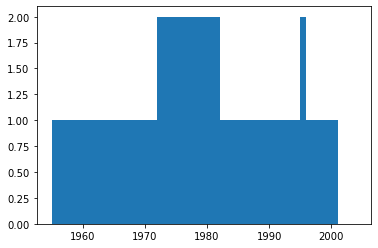

In [20]:
plt.hist(df.Year[df.Company=="CBS"],bins=range(1955,2005));

Zaista, u godinama 1972-1981. i kasnije 1995. imamo po dva CBS-a. Očigledno to sme. Nije zabranjeno da postoje dve kompanije sa istim imenom, pogotovo ako je to skraćenica. Šteta što ne postoje metapodaci da vidimo koje su to firme i odakle su. Svejedno, zaključujemo da **naziv kompanije nije jedinstven**.

Imamo previše varijabli da sve podatke odjednom prikažemo. Možemo da prikažemo npr. raspodelu prihode kompanija za sve ove godine.

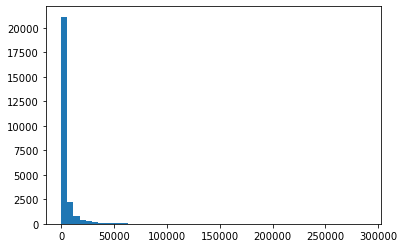

In [21]:
plt.hist(df.Revenue,bins=50);

Ovaj histogram nije mnogo informativan. Vidimo da ima mnogo kompanija koje su u mnogim godinama imale relativno mali prihod, dok je mali broj onih koji imaju 10000 (miliona dolara). Ovo bi se mnogo bolje videlo na logaritamskoj skali prihoda. Pajton nema jednostavan način da logaritmujemo x-osu kod histograma pa ćemo napraviti nejednake intervale koji bi izgledali jednaki kad ih logaritmujemo. Zato uniformnu podelu koristimo kao eksponent broja 10. Podelićemo _bins_ na intervale od 10^1 do 10^6 sa korakom 0.2 pomoću funkcije `arrange()`. Takođe ćemo objasniti Pajtonu da logaritmuje x-osu pomoću funkcije `xscale()`.

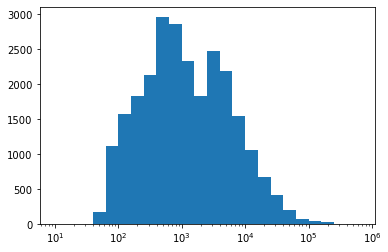

In [22]:
bins = 10**(np.arange(1,6,.2)) # 10**x je "10 na x" u Pajtonu
plt.xscale('log')
plt.hist(df.Revenue,bins=bins);

Sada se raspodela vidi mnogo bolje. Vidimo da je ima dva pika. Možda je slučajno, ali verovatno za to postoji dobar razlog.

Da vidimo kako izgleda raspodela profita.

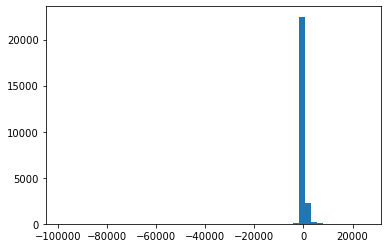

In [23]:
plt.hist(df.Profit,bins=50);

Imamo samo jedan uzan pik i vrlo širok raspon vrednosti. Ovde logaritmovanje x-ose ne bi pomoglo jer imamo i negativne vrednosti profita. Možda će grafikon biti informativniji ako samo logaritmujemo y-osu. Tada će se umesto vetikalne linije pojaviti raspodela.

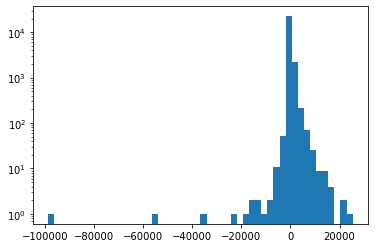

In [24]:
plt.hist(df.Profit,bins=50,log=True);

Očigledno, postoji mali broj slučajeva kada je profit prikazan kao veliki gubitak. Sem njih, većina kompanija ima profit oko nule s tim da je raspodela "deblja" na pozitivnom delu ose.

## Bivarijatna analiza

Kada poredimo vrednosti dve promenljive, onda imamo bivarijatnu analizu. To najčešće znači da posmatramo kako različite vrednosti jedne (nezavisne) promenljive imaju različite vrednosti druge (zavisno) promenljive. Da li zaista postoji uzročno-posledična veza to nije mnogo bitno za eksplorativnu analizu. Važno je da vidimo da li promenljive na bilo koji način zavise jedna od druge. Numerički pokazatelji te zavisnosti (kojima se sad nećemo baviti) su uglavnom ograničeni na linearnu vezu. Zato je suštinski važno da nacrtamo tačkasti dijagram i da vidimo tu zavisnost. 

Grafičko predstavljanje zavisnosti dve promenljive, takođe, može da ukaže i na postojanje šuma u podacima. Ispitivanje prirode tog šuma, odnosno njegog uzroka svakako zahteva neku dodatnu analizu.

Ovde ćemo prikazati zavisnost profita kompanija od njihovog prihoda u određenoj godini.

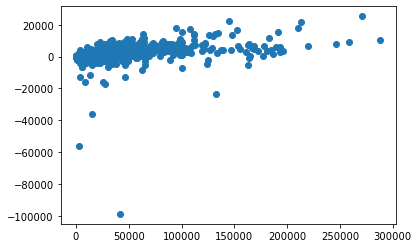

In [25]:
plt.scatter(df.Revenue,df.Profit);

Evidentno, onaj mali broj slučajeva kada profit ima ekstremno velike negativne vrednosti kvari celu sliku i ne možemo jasno da vidimo postoji li zavisnost ove prihoda i profita. U tom cilju ćemo prikazati samo one tačke gde je profit veći od -10000. Pošto znamo kakva je rapodela prihoda, možemo odmah da logaritmujemo x-osu. Tako će uvid u podatke biti bolji. 

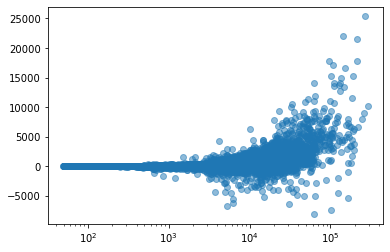

In [26]:
plt.xscale('log')
plt.scatter(df.Revenue[df.Profit>-1e4],df.Profit[df.Profit>-1e4],alpha=0.5);

Izgleda da zavisnost ove dve promenljive nije linearna. Za one kompanije sa malim prihodom (u proseku) nema profita, dok za one sa velikim eksponencijalno raste. To je __trend__ koji uočavamo. Naravno, ova zavisnost nije glatka. Ima mnogo tačaka koje odstupaju. To je __šum__.

## Uvid u deo skupa podataka

Do sada smo posmatrali sve podatke odjednom bez obzira što se ekomonomska situacija bitno menjala sa godinama. Za detaljniju analizu, možemo da izdvojimo podatke samo za jednu godinu. Ovde ćemo to uraditi za 2005.

In [27]:
df2005=df[df.Year==2005]

Dimenzije ovog manjeg skupa su naravno 500 puta 5.

In [28]:
df2005.shape

(500, 5)

Da li je u ovoj godini lista kompanija imala duplikate, odnosno ponavljanje imena možemo da utvrdimo pomoću funkcije `is_unique()`.

In [29]:
df2005.Company.is_unique

True

Sad možemo da prikažemo prihod po kompanijama. Koristimo trakasti dijagram, tj. _horizontal bar chart_.

Da bi imena kompanija bila prikazana na y-osi, potrebno je da tabeli df2005 definišemo indeksnu kolonu i da ona bude upravo kolona sa imenima kompanija.

In [30]:
df2005.index=df2005.Company

U narednih nekoliko linija koda stoji da otvaramo grafikon __fig__ sa osama __ax__, da će veličina grafikona biti 12 puta 6 inča, da uzimamo samo 15 najvećih kompanija, crtamo grafikon tipa `'barh'`, ispisujemo naslov i, konačno, obrćemo y-osu tako da prvi podaci budu na vrhu, a ne na dnu grafikona.

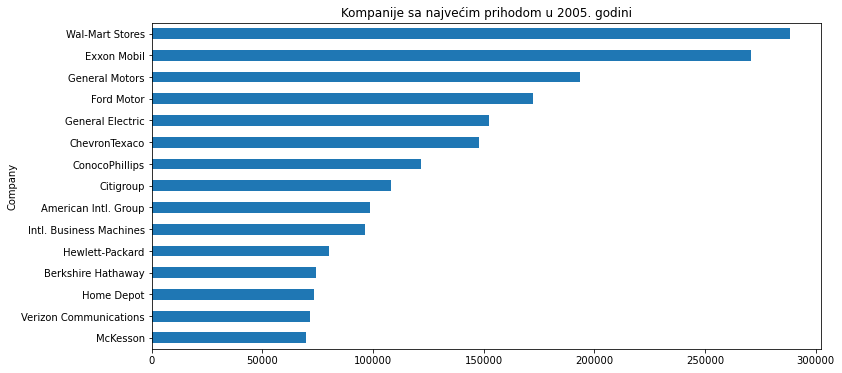

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))
df2005.Revenue.nlargest(15).plot(kind='barh')
plt.title('Kompanije sa najvećim prihodom u 2005. godini')
ax.invert_yaxis()

Na ovaj način ne možemo da prikažemo svih 500 kompanija, ali možemo da poredimo kompanije iz izabranog uzorka, npr. 15 sa najvećim prihodom.

Primetite da mi ne znamo u kojim su jedinicama dati prihod i profit. To nije dobro za zaključke koji se tiču apsolutnih vrednosti, ali nam ostavlja mogućnost da poredimo kompanije međusobno.

Na prethodnom grafikonu je prikazana zavisnost numeričke promenljive (prihod) od kategorijalne (ime kompanije). Slično možemo da prikažemo zabisnost dve numeričke promenjive, npr. kako su se menjali prihodi kompanija po godinama.

Jednostavnosti radi, izabraćemo jednu kompaniju i prikazati kako su se menjali prihodi od 1955. do 2005. godine. Pokušaćemo na isti grafikon da stavimo i zavisnost profita od vremena. To će Pajton onda prikazati drugom bojom (naranžastom).

Za primer ćemo uzeti prvu kompaniju iz tabele, tj. onu koja je 1955. imala naveći prihod -- General Motors. To onda izgleda ovako:

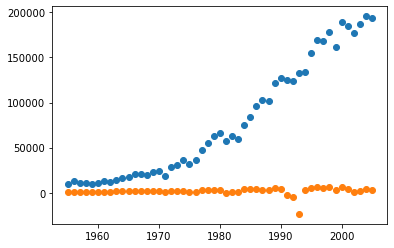

In [32]:
dfGM=df[df.Company=='General Motors']
plt.scatter(dfGM.Year,dfGM.Revenue);
plt.scatter(dfGM.Year,dfGM.Profit);

Za male diskretne vrednosti, kakve su pozicije na rang-listi, možemo podatke da prikažemo i malo drugačije. U nastavku je kôd koji prikazuje kretanja na rang-listi po godinama. Izabrali smo sami prvih deset kompanija po prihodu u 1955. godini pa pratimo njihove pozicije. Istina, malo ćemo odstupiti od pravila da EDA grafici treba da budu jednostavni i da se estetici ne pridaje mnogo pažnje.

Sam kôd nećemo posebno objašnjavati. Komentari postoje u samom programu. Ako vam nije sasvim jasno iz čitanja šta radi ovaj program, probajte ga. Varirajte parametre i gledajte šta se dešava. To je glavna prednost Džupiter svezaka. Ne moramo da znamo da napišemo program, ali bi uz malo truda trebalo da znamo da ga modifikujemo i primenimo u sličnoj situaciji.

In [52]:
companies = df["Company"].unique()[:10] # uzimamo samo prvih deset iz 1955.
glavna = companies[3] # treću sa liste ćemo tretirati posebno

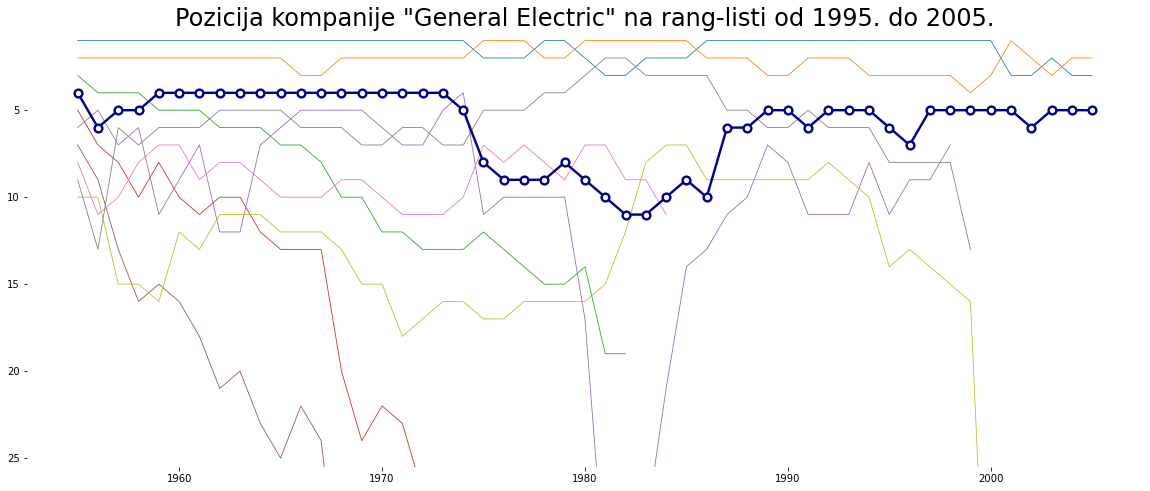

In [53]:
# otvaramo dijagram i zadajemo dimenzije
fig, ax = plt.subplots(figsize=(20, 8))
# invertujemo y-osu da bi gore bile kompanije koje su prve na rang-listi
ax.invert_yaxis()
# podešavamo gornju i donju granicu y-ose
ax.set_ylim(top=0.5,bottom=25.5)
# isključujemo pravougaoni okvir oko dijagrama
ax.set_frame_on(False)
# definišemo šta ide u naslov
naslov='Pozicija kompanije \"'+glavna+'\" na rang-listi od 1995. do 2005.'
ax.set_title(naslov, fontsize=24, fontweight=400);

# pravimo petlju i posebno crtamo grafik za svaku od deset kompanija
for i in companies:
    d = df[df["Company"] == i] 
    x = d["Year"].values
    y = d["Rank"].values

    # ako je kompanija ona koju hoćemo da naglasimo onda koristimo markere i deblju liniju
    if i == glavna:
        ax.plot(x, y, color="darkblue", lw=2.4, zorder=10)
        ax.scatter(x, y, fc="w", ec="darkblue", s=60, lw=2.4, zorder=12)      
    # ako ne onda tanje linije bez markera
    else:
        ax.plot(x, y, lw=.8)


Ovaj grafik nam prikazuje kretanja na rang-listi za svih deset prvoplasiranih iz 1955. godine. Vidimo da nije mnogo njih opstalo u vrhu - samo tri. Neke čak nisu pale na listi. Prestale su da postoje.

## Zaključak

Eksplorativna analiza podataka bi trebalo samo da pruži uvid u dostupne podatke. Najbolje je kad se radi istovremeno i numerički i grafički. Ponekad to ne može bez čišćenja podataka. Bilo bi dobro da znamo kontekst i meta-podatke, ali ponekad moramo da se snađemo i bez toga.  